In [206]:
import json
import numpy as np
import pandas as pd
import requests

In [207]:
def get_json(api_url):
 response = requests.get(api_url)
 if response.status_code == 200:
  return json.loads(response.content.decode('utf-8'))
 else:
  return None

In [208]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


<ipython-input-208-139498869e58>:3: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [209]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

In [210]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]
print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


<ipython-input-210-1930aac0ff04>:2: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



In [211]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
print(df_covid_denormalized.head(10))

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa
5      PE  2020-08-16   525803   26075     365367                      Peru
6      MX  2020-08-16   517714   56543     418164                    Mexico
7      CO  2020-08-16   456689   14810     274420                  Colombia
8      CL  2020-08-16   385946   10452     358828                     Chile
9      IR  2020-08-16   343203   19639     297486  Islamic Republic of Iran


In [212]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

In [213]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

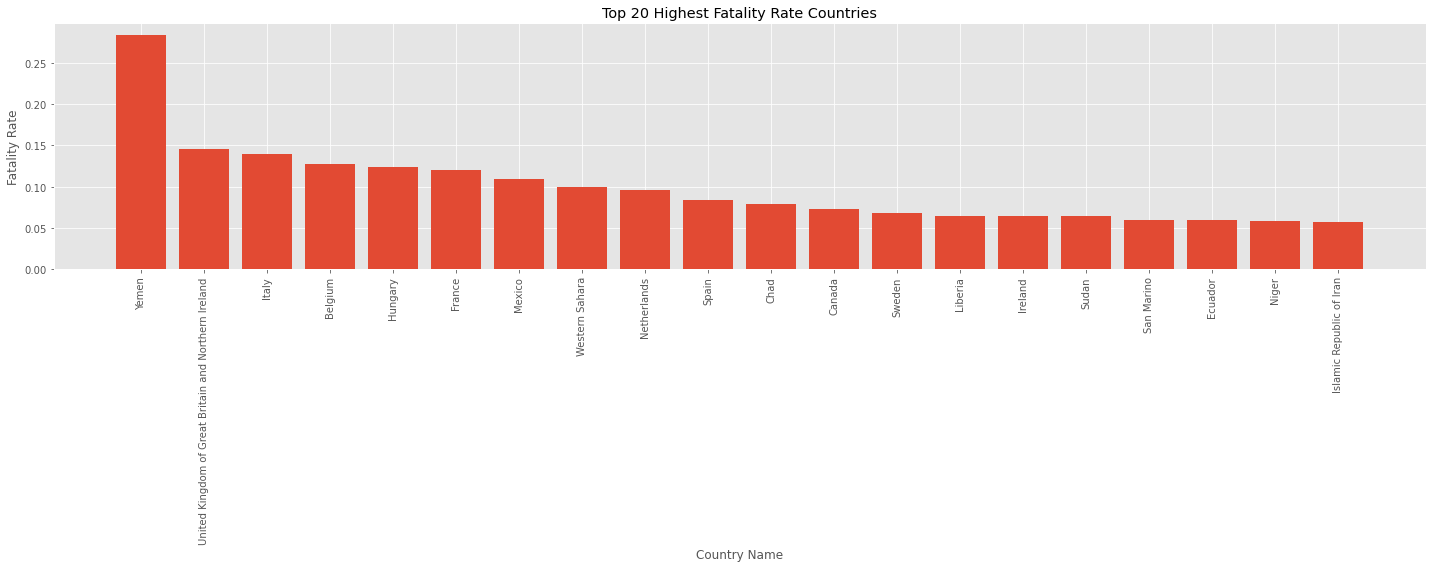

In [214]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [215]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
	covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
	df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
	df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
	df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
	if i==0:
		df_covid_timeline_merged = df_covid_timeline
	else:
		df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
	i=i+1

print(df_covid_timeline_merged.head())

<ipython-input-215-344f8192fd7f>:5: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



  country last_update  cases  deaths  recovered
0      VN  2020-12-27   1440      35       1303
1      VN  2020-12-26   1440      35       1303
2      VN  2020-12-25   1438      35       1303
3      VN  2020-12-24   1432      35       1281
4      VN  2020-12-23   1421      35       1281


In [216]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged , df_countries , on='country')

In [217]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

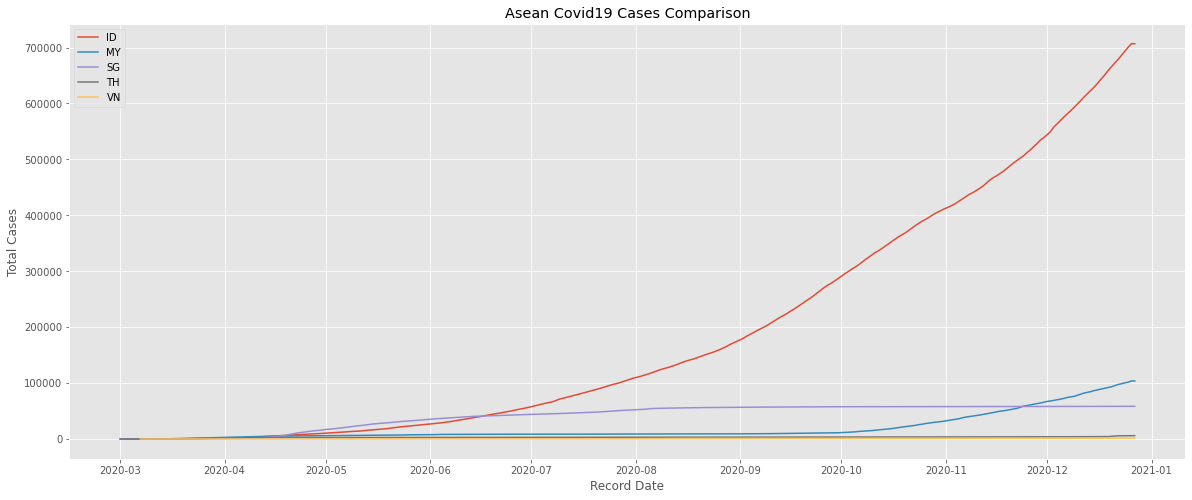

In [218]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
 country_data = df_covid_timeline_denormalized['country']==country
 x = df_covid_timeline_denormalized[country_data]['last_update']
 y = df_covid_timeline_denormalized[country_data]['cases']
 plt.plot(x, y, label = country)
plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()

In [219]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [220]:
resp = requests.get('https://data.covid19.go.id/public/api/update.json')
resp

<Response [200]>

In [221]:
cov_id_raw = resp.json()

In [222]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw : dict_keys(['data', 'update']).


In [223]:
cov_id_update = cov_id_raw['update']
cov_id_update.keys()

dict_keys(['penambahan', 'harian', 'total'])

In [224]:
cov_id_update['total']

{'jumlah_positif': 706837,
 'jumlah_dirawat': 109150,
 'jumlah_sembuh': 576693,
 'jumlah_meninggal': 20994}

In [225]:
cov_id_update['harian'][0:1]

[{'key_as_string': '2020-03-02T00:00:00.000Z',
  'key': 1583107200000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 2},
  'jumlah_dirawat': {'value': 2},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}}]

In [226]:
df = pd.DataFrame(cov_id_update['harian'])
df.tail()

,key_as_string,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
295,2020-12-22T00:00:00.000Z,1608595200000,1,{'value': 172},{'value': 5838},{'value': 6347},{'value': 337},{'value': 678125},{'value': 552722},{'value': 20257},{'value': 105146}
296,2020-12-23T00:00:00.000Z,1608681600000,1,{'value': 151},{'value': 5981},{'value': 7514},{'value': 1382},{'value': 685639},{'value': 558703},{'value': 20408},{'value': 106528}
297,2020-12-24T00:00:00.000Z,1608768000000,1,{'value': 181},{'value': 5277},{'value': 7199},{'value': 1741},{'value': 692838},{'value': 563980},{'value': 20589},{'value': 108269}
298,2020-12-25T00:00:00.000Z,1608854400000,1,{'value': 258},{'value': 6324},{'value': 7259},{'value': 677},{'value': 700097},{'value': 570304},{'value': 20847},{'value': 108946}
299,2020-12-26T00:00:00.000Z,1608940800000,1,{'value': 147},{'value': 6389},{'value': 6740},{'value': 204},{'value': 706837},{'value': 576693},{'value': 20994},{'value': 109150}


In [227]:
columns = df.columns
columns

Index(['key_as_string', 'key', 'doc_count', 'jumlah_meninggal',
       'jumlah_sembuh', 'jumlah_positif', 'jumlah_dirawat',
       'jumlah_positif_kum', 'jumlah_sembuh_kum', 'jumlah_meninggal_kum',
       'jumlah_dirawat_kum'],
      dtype='object')

In [228]:
columns = columns.drop(['key_as_string', 'key', 'doc_count'])
for column in columns:
    df[column] = df[column].apply(pd.Series)
df.drop(['key_as_string','doc_count'], axis=1, inplace=True)
df.rename(columns={"key" : "tanggal"}, inplace=True)
df.head()

,tanggal,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,1583107200000,0,0,2,2,2,0,0,2
1,1583193600000,0,0,0,0,2,0,0,2
2,1583280000000,0,0,0,0,2,0,0,2
3,1583366400000,0,0,0,0,2,0,0,2
4,1583452800000,0,0,2,2,4,0,0,4


In [229]:
df['tanggal'] = pd.to_datetime(df['tanggal']*1e6, unit='ns')
df.head()

,tanggal,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02,0,0,2,2,2,0,0,2
1,2020-03-03,0,0,0,0,2,0,0,2
2,2020-03-04,0,0,0,0,2,0,0,2
3,2020-03-05,0,0,0,0,2,0,0,2
4,2020-03-06,0,0,2,2,4,0,0,4


In [230]:
df = df[['tanggal', 'jumlah_positif', 'jumlah_meninggal', 'jumlah_sembuh']].rename(columns=({'jumlah_positif' : 'kasus_baru', 'jumlah_meninggal' : 'meninggal', 'jumlah_sembuh' : 'sembuh'}))

In [231]:
df.tail()

,tanggal,kasus_baru,meninggal,sembuh
295,2020-12-22,6347,172,5838
296,2020-12-23,7514,151,5981
297,2020-12-24,7199,181,5277
298,2020-12-25,7259,258,6324
299,2020-12-26,6740,147,6389


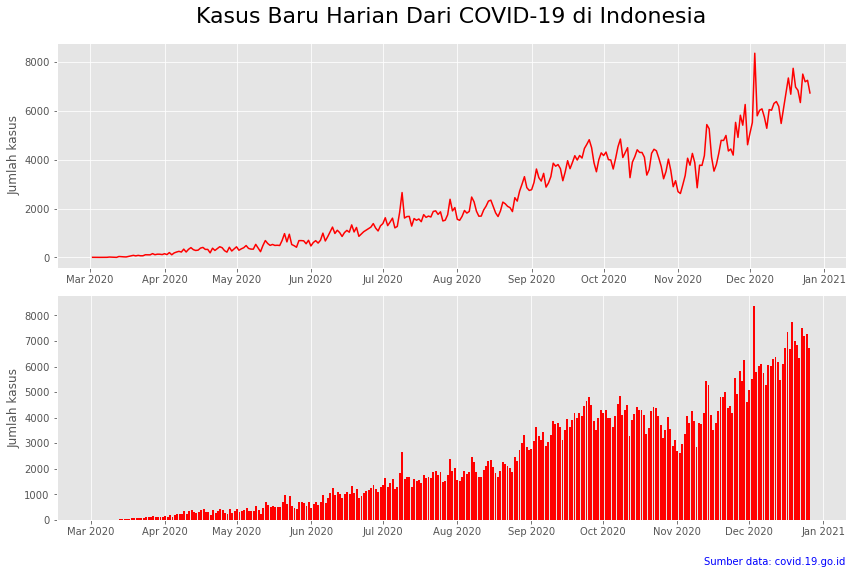

In [232]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].plot(df['tanggal'], df['kasus_baru'], 'r')
ax[0].set_title('Kasus Baru Harian Dari COVID-19 di Indonesia',pad=20, fontsize=22)
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah kasus')
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


ax[1].bar(data=df, x='tanggal', height='kasus_baru', color='red')
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah kasus')
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax[1].text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',ha='right', transform=ax[1].transAxes)
plt.grid(axis='y')
plt.tight_layout()

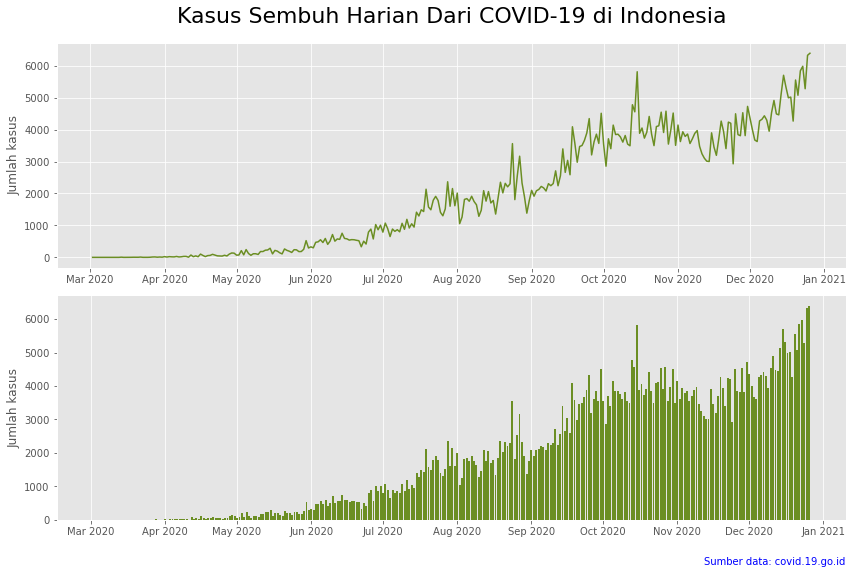

In [233]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].plot(df['tanggal'], df['sembuh'], 'olivedrab')
ax[0].set_title('Kasus Sembuh Harian Dari COVID-19 di Indonesia',pad=20, fontsize=22)
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah kasus')
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


ax[1].bar(data=df, x='tanggal', height='sembuh', color='olivedrab')
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah kasus')
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax[1].text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',ha='right', transform=ax[1].transAxes)
plt.grid(axis='y')
plt.tight_layout()

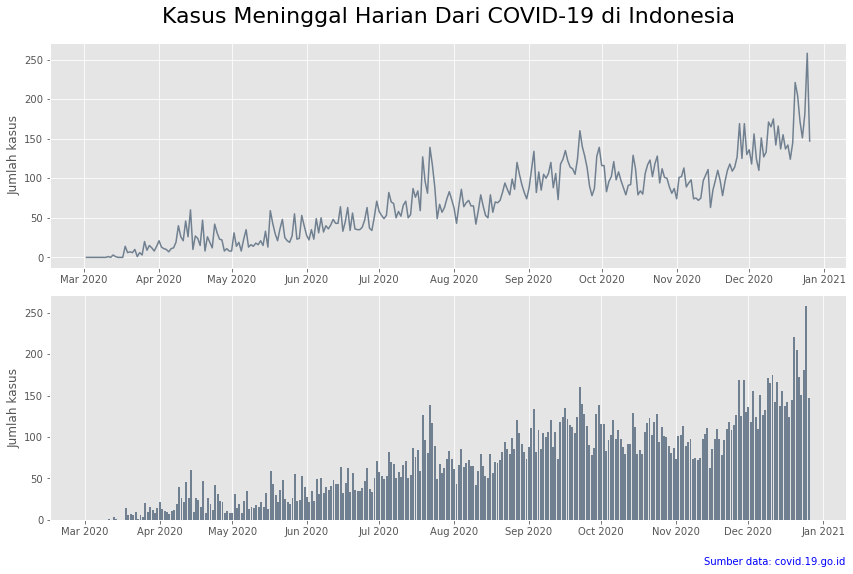

In [234]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
ax[0].plot(df['tanggal'], df['meninggal'], 'slategrey')
ax[0].set_title('Kasus Meninggal Harian Dari COVID-19 di Indonesia',pad=20, fontsize=22)
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah kasus')
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))


ax[1].bar(data=df, x='tanggal', height='meninggal', color='slategrey')
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah kasus')
ax[1].xaxis.set_major_locator(mdates.MonthLocator())
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax[1].text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',ha='right', transform=ax[1].transAxes)
plt.grid(axis='y')
plt.tight_layout()

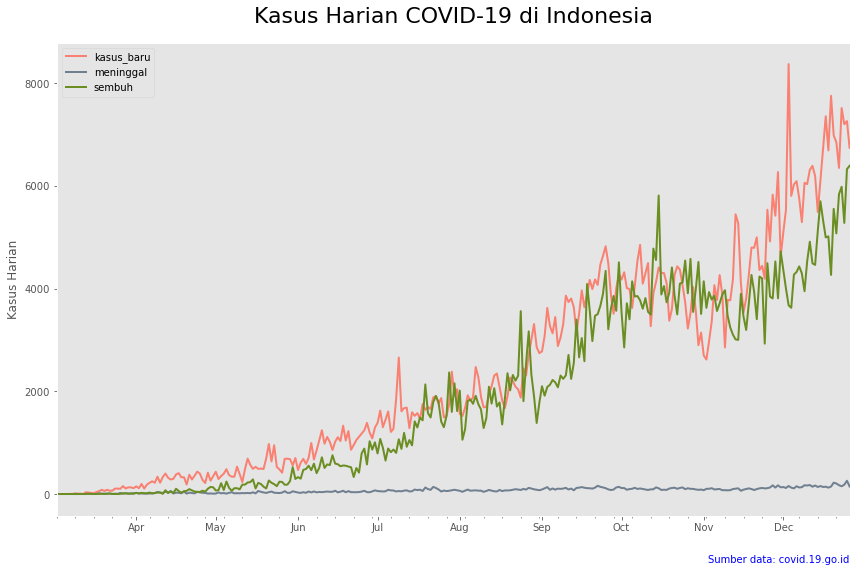

In [235]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(x='tanggal', kind='line', ax=ax, lw=2, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Kasus Harian COVID-19 di Indonesia', pad=20, fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Kasus Harian', fontsize=12)
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()

In [236]:
df_weekly = (df.set_index('tanggal')[['kasus_baru', 'sembuh', 'meninggal']]
                                   .resample('W')
                                   .sum()
                                   .reset_index())
df_weekly.head()

,tanggal,kasus_baru,sembuh,meninggal
0,2020-03-08,6,0,0
1,2020-03-15,111,8,5
2,2020-03-22,397,21,43
3,2020-03-29,771,35,66
4,2020-04-05,988,100,84


In [237]:
df_weekly['tahun'] = df_weekly['tanggal'].apply(lambda x: x.year)
df_weekly['pekan_ke'] = df_weekly['tanggal'].apply(lambda x: x.weekofyear)
df_weekly = df_weekly[['tahun', 'pekan_ke', 'kasus_baru', 'sembuh', 'meninggal']]
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tahun       43 non-null     int64
 1   pekan_ke    43 non-null     int64
 2   kasus_baru  43 non-null     int64
 3   sembuh      43 non-null     int64
 4   meninggal   43 non-null     int64
dtypes: int64(5)
memory usage: 1.8 KB


In [238]:
df_weekly.head()

,tahun,pekan_ke,kasus_baru,sembuh,meninggal
0,2020,10,6,0,0
1,2020,11,111,8,5
2,2020,12,397,21,43
3,2020,13,771,35,66
4,2020,14,988,100,84


In [239]:
df_weekly['kasusbaru_pekanlalu'] = df_weekly['kasus_baru'].shift().replace(np.nan, 0).astype(np.int)
df_weekly['kasusbaru_status'] = df_weekly['kasus_baru'] < df_weekly['kasusbaru_pekanlalu']

df_weekly['sembuh_pekanlalu'] = df_weekly['sembuh'].shift().replace(np.nan, 0).astype(np.int)
df_weekly['sembuh_status'] = df_weekly['sembuh'] < df_weekly['sembuh_pekanlalu']

df_weekly['meninggal_pekanlalu'] = df_weekly['meninggal'].shift().replace(np.nan, 0).astype(np.int)
df_weekly['meninggal_status'] = df_weekly['meninggal'] < df_weekly['meninggal_pekanlalu']


df_weekly.head(10)

,tahun,pekan_ke,kasus_baru,sembuh,meninggal,kasusbaru_pekanlalu,kasusbaru_status,sembuh_pekanlalu,sembuh_status,meninggal_pekanlalu,meninggal_status
0,2020,10,6,0,0,0,False,0,False,0,False
1,2020,11,111,8,5,6,False,0,False,0,False
2,2020,12,397,21,43,111,False,8,False,5,False
3,2020,13,771,35,66,397,False,21,False,43,False
4,2020,14,988,100,84,771,False,35,False,66,False
5,2020,15,1968,195,175,988,False,100,False,84,False
6,2020,16,2334,327,209,1968,False,195,False,175,False
7,2020,17,2307,421,161,2334,True,327,False,209,True
8,2020,18,2310,769,102,2307,False,421,False,161,True
9,2020,19,2840,822,128,2310,False,769,False,102,False


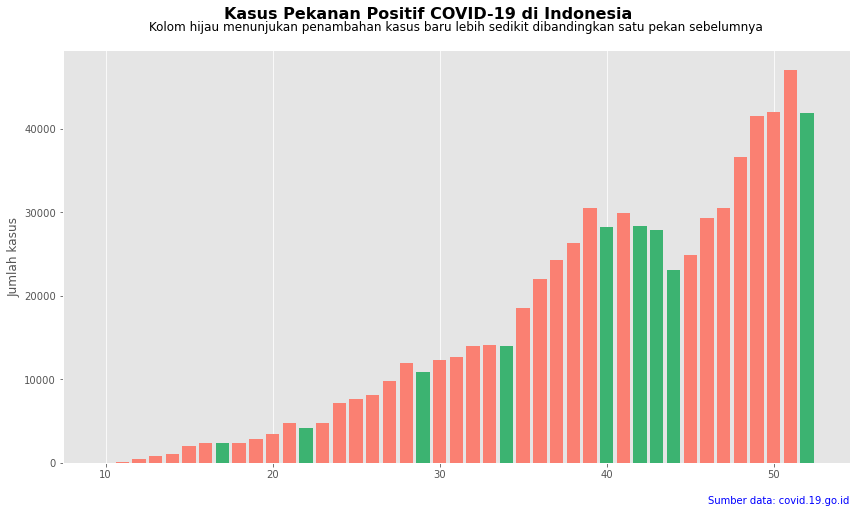

In [240]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=df_weekly, x='pekan_ke', height='kasus_baru', 
       color=['mediumseagreen' if x is True else 'salmon' for x in df_weekly['kasusbaru_status']]) 
fig.suptitle('Kasus Pekanan Positif COVID-19 di Indonesia', y=1.005, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',pad=20,
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()

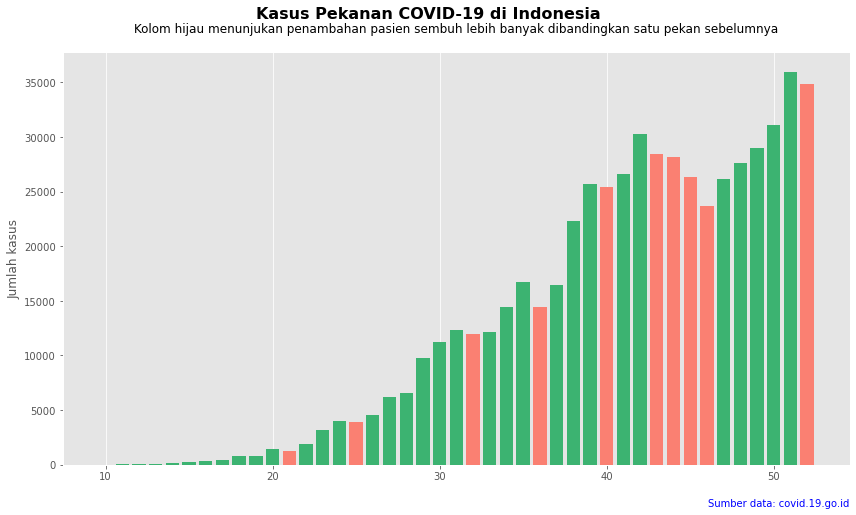

In [241]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=df_weekly, x='pekan_ke', height='sembuh', 
       color=['salmon' if x is True else 'mediumseagreen' for x in df_weekly['sembuh_status']]) 
fig.suptitle('Kasus Pekanan COVID-19 di Indonesia', y=1.01, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan pasien sembuh lebih banyak dibandingkan satu pekan sebelumnya',pad=20,
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()

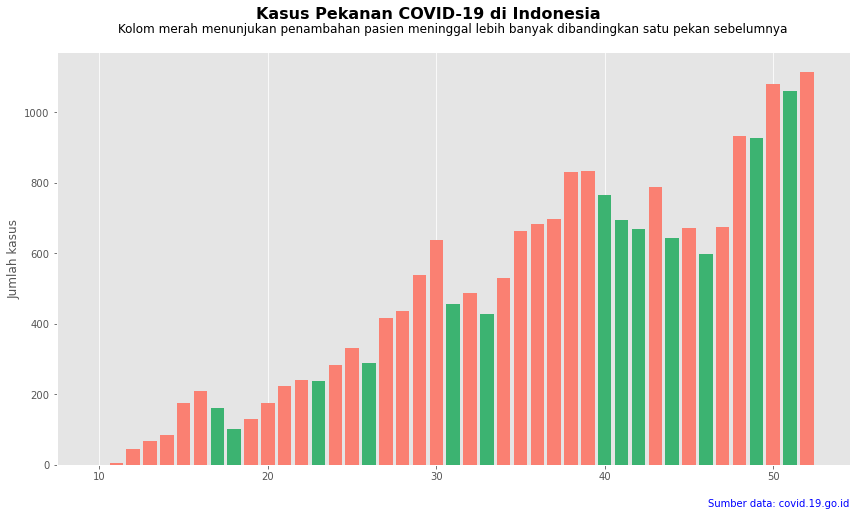

In [242]:
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(data=df_weekly, x='pekan_ke', height='meninggal', 
       color=['mediumseagreen' if x is True else 'salmon' for x in df_weekly['meninggal_status']]) 
fig.suptitle('Kasus Pekanan COVID-19 di Indonesia', y=1.01, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom merah menunjukan penambahan pasien meninggal lebih banyak dibandingkan satu pekan sebelumnya',pad=20,
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue', ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()

In [243]:
df_akumulasi = df[['tanggal']].copy()
df_akumulasi['akumulasi_aktif'] = (df['kasus_baru'] - df['sembuh'] - df['meninggal']).cumsum()
df_akumulasi['akumulasi_sembuh'] = df['sembuh'].cumsum()
df_akumulasi['akumulasi_meninggal'] = df['meninggal'].cumsum()
df_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
295,2020-12-22,105146,552722,20257
296,2020-12-23,106528,558703,20408
297,2020-12-24,108269,563980,20589
298,2020-12-25,108946,570304,20847
299,2020-12-26,109150,576693,20994


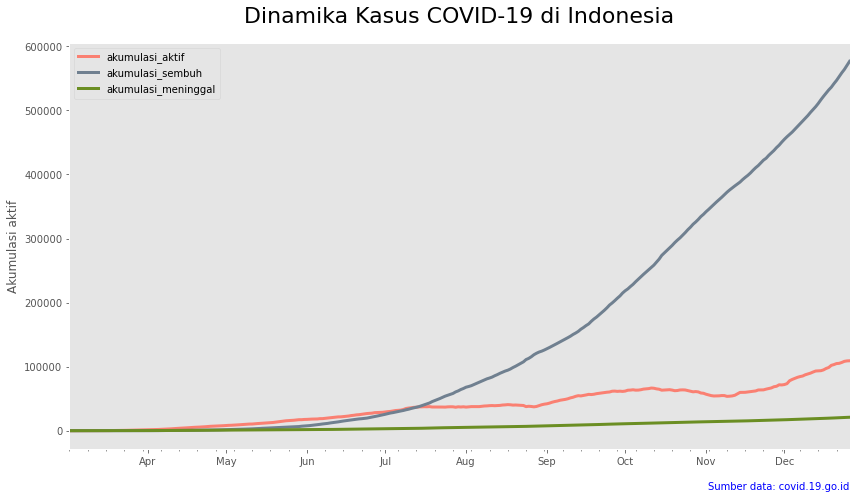

In [244]:
fig, ax = plt.subplots(figsize=(12,7))
df_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Indonesia', pad=20, fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()

In [245]:
import pandas as pd
import json
import requests

import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8

import cufflinks as cf

import folium
pyo.init_notebook_mode(connected = True)
cf.go_offline()

import numpy as np
from random import randint

import pycountry

In [246]:
api = "https://opendata.arcgis.com/datasets/0c0f4558f1e548b68a1c82112744bad3_0.geojson"

In [247]:
r = requests.get(api)
r

<Response [200]>

In [248]:
data = r.json()
df = pd.json_normalize(data,'features', sep = "_")
df.head()

,type,properties_FID,properties_Kode_Provi,properties_Provinsi,properties_Kasus_Posi,properties_Kasus_Semb,properties_Kasus_Meni,geometry_type,geometry_coordinates
0,Feature,1,11,Aceh,8698,7118,358,Point,"[96.90952274800009, 4.225081892000048]"
1,Feature,2,12,Sumatera Utara,17732,14999,670,Point,"[99.05788784900005, 2.184779215000049]"
2,Feature,3,13,Sumatera Barat,23063,19872,490,Point,"[100.46680503000005, -0.85191434799998]"
3,Feature,4,14,Riau,24401,22240,567,Point,"[101.81289195400007, 0.510525849000032]"
4,Feature,5,15,Jambi,3096,2211,52,Point,"[103.59932, -1.61775]"


In [249]:
df.drop(columns = ['type', 'properties_FID', 'geometry_type', 'properties_Kode_Provi'],index = 34, inplace = True)
df

,properties_Provinsi,properties_Kasus_Posi,properties_Kasus_Semb,properties_Kasus_Meni,geometry_coordinates
0,Aceh,8698,7118,358,"[96.90952274800009, 4.225081892000048]"
1,Sumatera Utara,17732,14999,670,"[99.05788784900005, 2.184779215000049]"
2,Sumatera Barat,23063,19872,490,"[100.46680503000005, -0.85191434799998]"
3,Riau,24401,22240,567,"[101.81289195400007, 0.510525849000032]"
4,Jambi,3096,2211,52,"[103.59932, -1.61775]"
5,Sumatera Selatan,11367,9168,599,"[104.17041944500005, -3.213346821999949]"
6,Bengkulu,3354,2327,114,"[102.26312, -3.79116]"
7,Bangka Belitung,2002,1483,31,"[105.98694808200008, -2.252956410999957]"
8,Lampung,5856,3826,250,"[105.01831305100006, -4.918073086999925]"
9,Kepulauan Riau,6870,5837,165,"[108.20222888900008, 3.915947241000026]"


In [250]:
df.rename(columns = {'properties_Provinsi':'Provinsi', 'properties_Kasus_Posi':"Dikonfirmasi",
                     "properties_Kasus_Semb":"Sembuh","properties_Kasus_Meni":"Meninggal Dunia",
                     "geometry_coordinates":"geometry coordinates"}, inplace = True)
df

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates
0,Aceh,8698,7118,358,"[96.90952274800009, 4.225081892000048]"
1,Sumatera Utara,17732,14999,670,"[99.05788784900005, 2.184779215000049]"
2,Sumatera Barat,23063,19872,490,"[100.46680503000005, -0.85191434799998]"
3,Riau,24401,22240,567,"[101.81289195400007, 0.510525849000032]"
4,Jambi,3096,2211,52,"[103.59932, -1.61775]"
5,Sumatera Selatan,11367,9168,599,"[104.17041944500005, -3.213346821999949]"
6,Bengkulu,3354,2327,114,"[102.26312, -3.79116]"
7,Bangka Belitung,2002,1483,31,"[105.98694808200008, -2.252956410999957]"
8,Lampung,5856,3826,250,"[105.01831305100006, -4.918073086999925]"
9,Kepulauan Riau,6870,5837,165,"[108.20222888900008, 3.915947241000026]"


In [251]:
df['Kasus Aktiv'] = df['Dikonfirmasi'] - df['Sembuh'] - df['Meninggal Dunia']
df

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv
0,Aceh,8698,7118,358,"[96.90952274800009, 4.225081892000048]",1222
1,Sumatera Utara,17732,14999,670,"[99.05788784900005, 2.184779215000049]",2063
2,Sumatera Barat,23063,19872,490,"[100.46680503000005, -0.85191434799998]",2701
3,Riau,24401,22240,567,"[101.81289195400007, 0.510525849000032]",1594
4,Jambi,3096,2211,52,"[103.59932, -1.61775]",833
5,Sumatera Selatan,11367,9168,599,"[104.17041944500005, -3.213346821999949]",1600
6,Bengkulu,3354,2327,114,"[102.26312, -3.79116]",913
7,Bangka Belitung,2002,1483,31,"[105.98694808200008, -2.252956410999957]",488
8,Lampung,5856,3826,250,"[105.01831305100006, -4.918073086999925]",1780
9,Kepulauan Riau,6870,5837,165,"[108.20222888900008, 3.915947241000026]",868


In [252]:
df['Sembuh %'] = df.Sembuh / df.Dikonfirmasi * 100
df['Sembuh %'] = df['Sembuh %'].round().astype('int')
df['Meninggal %'] = df['Meninggal Dunia'] / df.Dikonfirmasi * 100
df['Meninggal %'] = df['Meninggal %'].round().astype('int')
df

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv,Sembuh %,Meninggal %
0,Aceh,8698,7118,358,"[96.90952274800009, 4.225081892000048]",1222,82,4
1,Sumatera Utara,17732,14999,670,"[99.05788784900005, 2.184779215000049]",2063,85,4
2,Sumatera Barat,23063,19872,490,"[100.46680503000005, -0.85191434799998]",2701,86,2
3,Riau,24401,22240,567,"[101.81289195400007, 0.510525849000032]",1594,91,2
4,Jambi,3096,2211,52,"[103.59932, -1.61775]",833,71,2
5,Sumatera Selatan,11367,9168,599,"[104.17041944500005, -3.213346821999949]",1600,81,5
6,Bengkulu,3354,2327,114,"[102.26312, -3.79116]",913,69,3
7,Bangka Belitung,2002,1483,31,"[105.98694808200008, -2.252956410999957]",488,74,2
8,Lampung,5856,3826,250,"[105.01831305100006, -4.918073086999925]",1780,65,4
9,Kepulauan Riau,6870,5837,165,"[108.20222888900008, 3.915947241000026]",868,85,2


In [253]:
df.style.background_gradient(cmap = "Reds")

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,geometry coordinates,Kasus Aktiv,Sembuh %,Meninggal %
0,Aceh,8698,7118,358,"[96.90952274800009, 4.225081892000048]",1222,82,4
1,Sumatera Utara,17732,14999,670,"[99.05788784900005, 2.184779215000049]",2063,85,4
2,Sumatera Barat,23063,19872,490,"[100.46680503000005, -0.85191434799998]",2701,86,2
3,Riau,24401,22240,567,"[101.81289195400007, 0.510525849000032]",1594,91,2
4,Jambi,3096,2211,52,"[103.59932, -1.61775]",833,71,2
5,Sumatera Selatan,11367,9168,599,"[104.17041944500005, -3.213346821999949]",1600,81,5
6,Bengkulu,3354,2327,114,"[102.26312, -3.79116]",913,69,3
7,Bangka Belitung,2002,1483,31,"[105.98694808200008, -2.252956410999957]",488,74,2
8,Lampung,5856,3826,250,"[105.01831305100006, -4.918073086999925]",1780,65,4
9,Kepulauan Riau,6870,5837,165,"[108.20222888900008, 3.915947241000026]",868,85,2


In [254]:
kasus_aktiv_ = df.groupby("Provinsi")["Kasus Aktiv"].sum().sort_values(ascending = False).to_frame()
kasus_aktiv_.style.background_gradient(cmap = "Reds")

,Kasus Aktiv
Provinsi,
Jawa Tengah,22476
DKI Jakarta,14058
Jawa Barat,12393
Banten,6785
Papua,6240
Jawa Timur,6086
Sulawesi Selatan,4997
Daerah Istimewa Yogyakarta,3528
Kalimantan Timur,3512


In [255]:
Dikonfirmasi_ = df.groupby("Provinsi")["Dikonfirmasi"].sum().sort_values(ascending = False).to_frame()
Dikonfirmasi_.style.background_gradient(cmap = "Reds")

,Dikonfirmasi
Provinsi,
DKI Jakarta,173929
Jawa Timur,80010
Jawa Barat,78698
Jawa Tengah,77008
Sulawesi Selatan,28863
Kalimantan Timur,25770
Riau,24401
Sumatera Barat,23063
Sumatera Utara,17732


In [256]:
Sembuh_ = df.groupby("Provinsi")["Sembuh"].sum().sort_values(ascending = False).to_frame()
Sembuh_.style.background_gradient(cmap = "Reds")

,Sembuh
Provinsi,
DKI Jakarta,156704
Jawa Timur,68389
Jawa Barat,65191
Jawa Tengah,51365
Sulawesi Selatan,23291
Riau,22240
Kalimantan Timur,21540
Sumatera Barat,19872
Bali,15455


In [257]:
Meninggal_ = df.groupby("Provinsi")["Meninggal Dunia"].sum().sort_values(ascending = False).to_frame()
Meninggal_.style.background_gradient(cmap = "Reds")

,Meninggal Dunia
Provinsi,
Jawa Timur,5535
DKI Jakarta,3167
Jawa Tengah,3167
Jawa Barat,1114
Kalimantan Timur,718
Sumatera Utara,670
Sumatera Selatan,599
Kalimantan Selatan,578
Sulawesi Selatan,575


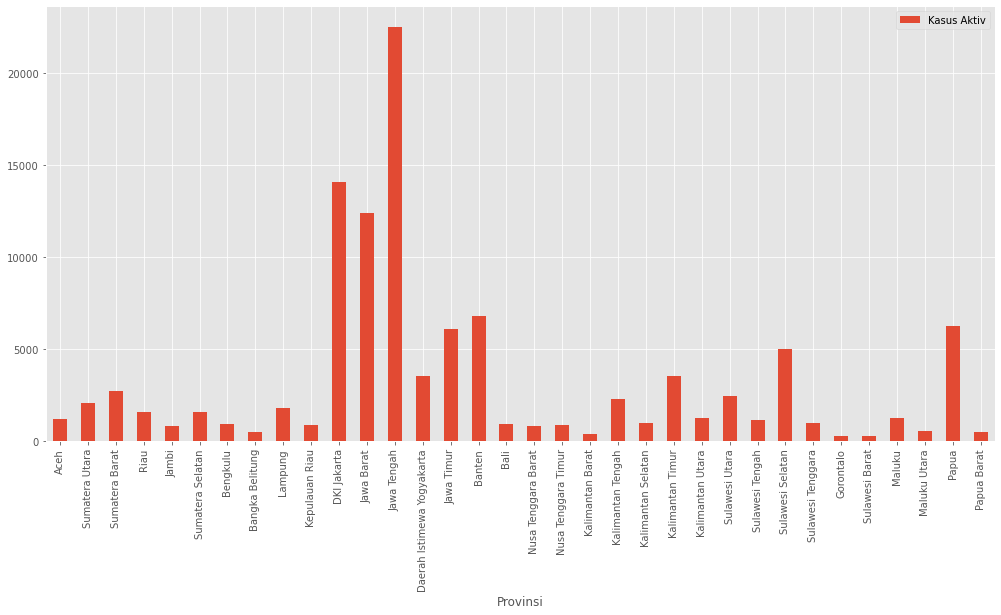

In [258]:
df.plot(kind = "bar", x = "Provinsi", y = "Kasus Aktiv", figsize = (17,8))

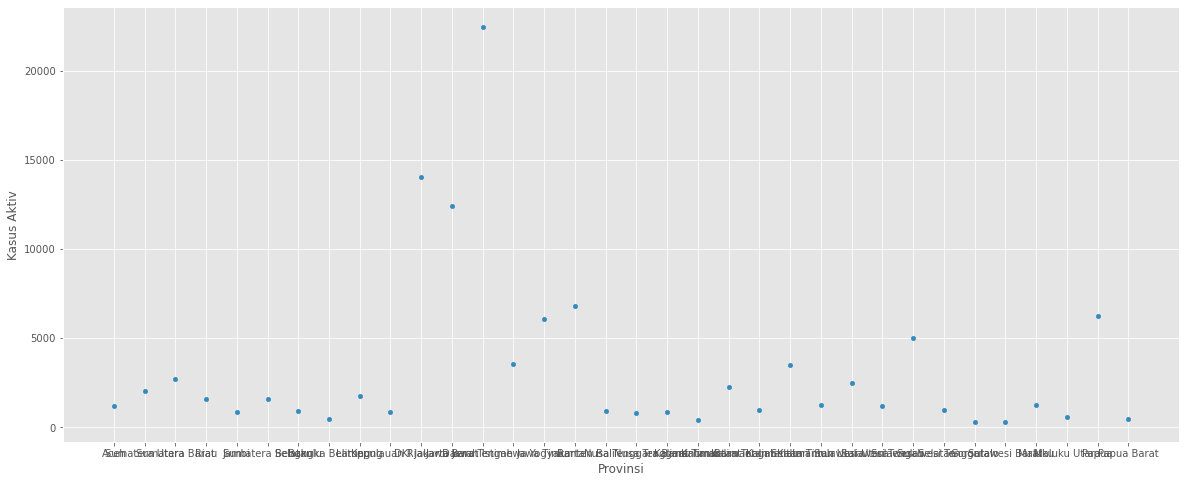

In [259]:
df.plot(kind = "scatter", x = "Provinsi", y = "Kasus Aktiv")

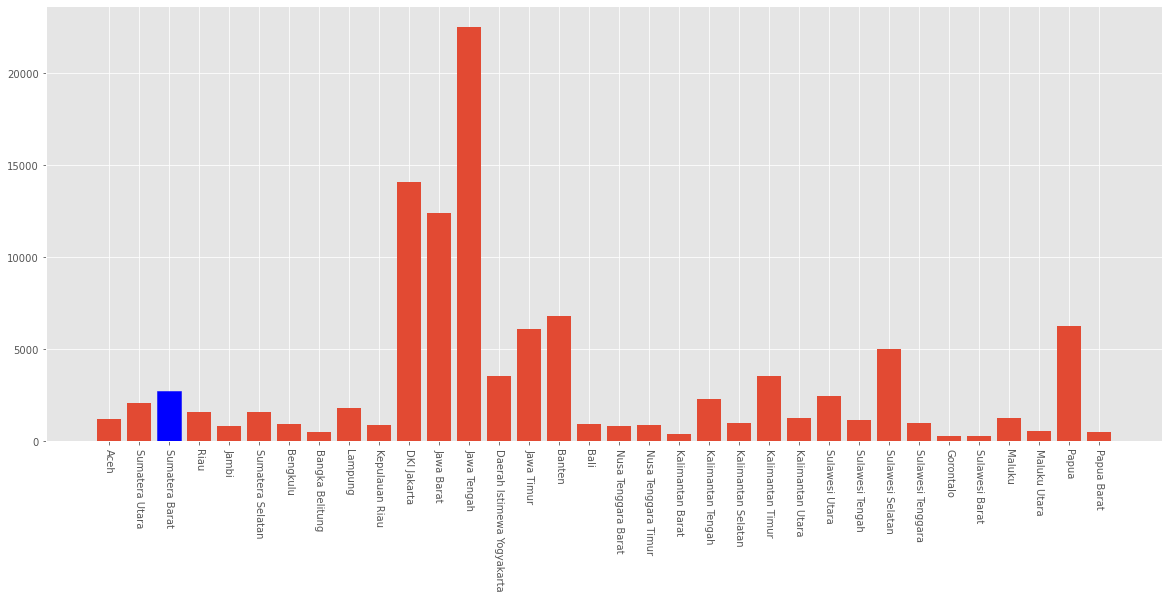

In [260]:
color = plt.bar(df["Provinsi"], df["Kasus Aktiv"])
color[2].set_color('blue')
plt.xticks( rotation =270)
plt.show()

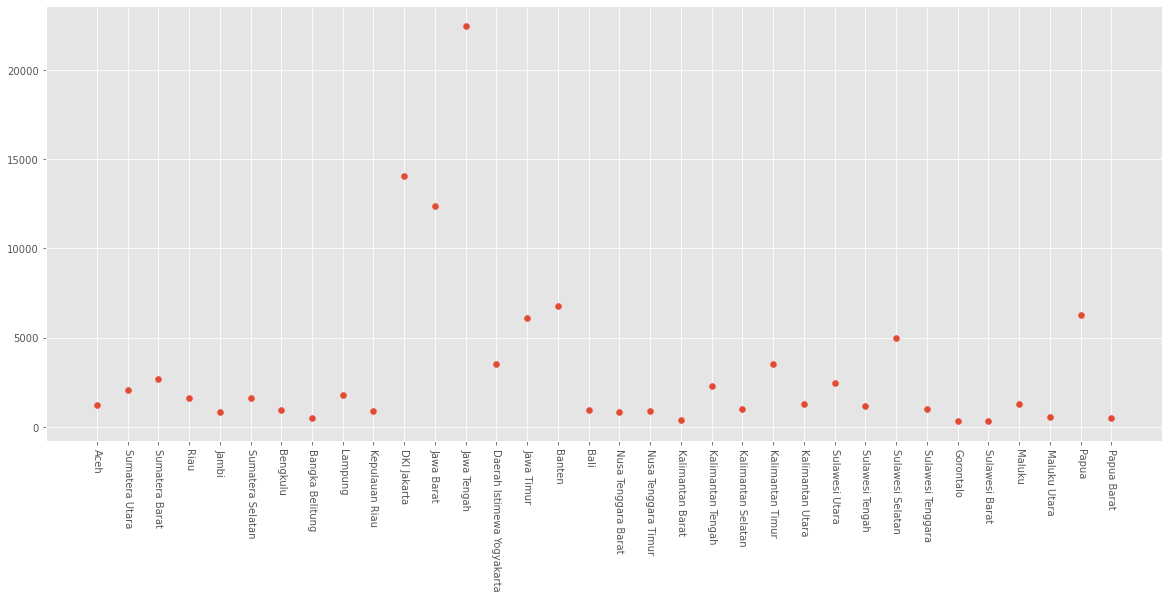

In [261]:
plt.scatter(df["Provinsi"], df["Kasus Aktiv"])
plt.xticks( rotation =270)
plt.show()

In [262]:
df_sort = df.sort_values(by = "Sembuh", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Sembuh', y='Provinsi',
             color='Sembuh', orientation='h', text = 'Sembuh', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [263]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Sembuh %"],
             color='Sembuh %', text = 'Sembuh %')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [264]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Meninggal %"],
             color='Meninggal %', text = 'Meninggal %')
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [265]:
df.loc[:, 'latitude'] = df['geometry coordinates'].map(lambda x: x[0])
df.loc[:, 'longitude'] = df['geometry coordinates'].map(lambda x: x[1])
df.drop(columns = 'geometry coordinates', inplace = True)
df

,Provinsi,Dikonfirmasi,Sembuh,Meninggal Dunia,Kasus Aktiv,Sembuh %,Meninggal %,latitude,longitude
0,Aceh,8698,7118,358,1222,82,4,96.909523,4.225082
1,Sumatera Utara,17732,14999,670,2063,85,4,99.057888,2.184779
2,Sumatera Barat,23063,19872,490,2701,86,2,100.466805,-0.851914
3,Riau,24401,22240,567,1594,91,2,101.812892,0.510526
4,Jambi,3096,2211,52,833,71,2,103.599320,-1.617750
5,Sumatera Selatan,11367,9168,599,1600,81,5,104.170419,-3.213347
6,Bengkulu,3354,2327,114,913,69,3,102.263120,-3.791160
7,Bangka Belitung,2002,1483,31,488,74,2,105.986948,-2.252956
8,Lampung,5856,3826,250,1780,65,4,105.018313,-4.918073
9,Kepulauan Riau,6870,5837,165,868,85,2,108.202229,3.915947


In [266]:
map = folium.Map(location=[-0.789275,113.921327], zoom_start = 4.49, tiles = 'openstreetmap')

for lat,long,value,name in zip(df['longitude'],df['latitude'],df['Dikonfirmasi'],df['Provinsi']):
    folium.CircleMarker([lat,long],radius=value*0.004,popup=('<strong>Provinsi</strong>: '+ str(name).capitalize()+'<br>''<strong>Dikonfirmasi</strong>: ' + str(value)+'<br>'),color='red', fill_color = 'red',fill_opacity=0.3).add_to(map)

map

In [301]:
import pandas as pd

read_file = pd.read_excel (r'Standar Kelurahan Data Corona (26 Desember 2020 Pukul 10.00).xlsx')
read_file.to_csv (r'Standar Kelurahan Data Corona (26 Desember 2020 Pukul 10.00).csv', index = None, header=True)
df1 = pd.read_csv("Standar Kelurahan Data Corona (26 Desember 2020 Pukul 10.00).csv")
df1.head()

,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,...,DISCARDED,Isolasi di Rumah.4,Meninggal,Selesai Isolasi.4,POSITIF,Dirawat,Sembuh,Meninggal.1,Self Isolation,Keterangan
0,NaN,NaN,NaN,NaN,TOTAL,328991,717,20999,2311,304964,...,15002,0,1,15001,173929,4510,156798,3182,9439,NaN
1,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,869,3,69,0,797,...,14,0,0,14,439,5,403,7,24,NaN
2,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,873,1,31,2,839,...,27,0,0,27,275,8,255,4,8,NaN
3,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,546,0,34,1,511,...,27,0,0,27,351,17,304,7,23,NaN
4,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,179,0,2,1,176,...,10,0,0,10,234,4,219,4,7,NaN


In [302]:
df1.drop(columns =['ID_KEL', 'Nama_provinsi','nama_kelurahan','nama_kecamatan','Keterangan'] ,index = 0, inplace = True)
df1.head()

,nama_kota,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,PROBABLE,Perawatan RS.1,Isolasi di Rumah.1,Probable Meninggal,...,Selesai Isolasi.3,DISCARDED,Isolasi di Rumah.4,Meninggal,Selesai Isolasi.4,POSITIF,Dirawat,Sembuh,Meninggal.1,Self Isolation
1,JAKARTA UTARA,869,3,69,0,797,4,0,0,0,...,956,14,0,0,14,439,5,403,7,24
2,JAKARTA BARAT,873,1,31,2,839,3,0,0,1,...,641,27,0,0,27,275,8,255,4,8
3,JAKARTA TIMUR,546,0,34,1,511,7,0,0,0,...,988,27,0,0,27,351,17,304,7,23
4,JAKARTA TIMUR,179,0,2,1,176,2,0,0,0,...,367,10,0,0,10,234,4,219,4,7
5,JAKARTA TIMUR,957,2,40,1,914,2,1,0,0,...,1303,24,0,0,24,353,8,324,6,15


In [303]:
df_new = df1[(df1['nama_kota'] == "JAKARTA BARAT") | (df1['nama_kota'] == "JAKARTA UTARA") | (df1['nama_kota'] == "JAKARTA TIMUR") | (df1['nama_kota'] == "JAKARTA SELATAN") | (df1['nama_kota'] == "JAKARTA PUSAT") ]
df_new.reset_index(inplace = True)
df_new.head()

,index,nama_kota,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,PROBABLE,Perawatan RS.1,Isolasi di Rumah.1,...,Selesai Isolasi.3,DISCARDED,Isolasi di Rumah.4,Meninggal,Selesai Isolasi.4,POSITIF,Dirawat,Sembuh,Meninggal.1,Self Isolation
0,1,JAKARTA UTARA,869,3,69,0,797,4,0,0,...,956,14,0,0,14,439,5,403,7,24
1,2,JAKARTA BARAT,873,1,31,2,839,3,0,0,...,641,27,0,0,27,275,8,255,4,8
2,3,JAKARTA TIMUR,546,0,34,1,511,7,0,0,...,988,27,0,0,27,351,17,304,7,23
3,4,JAKARTA TIMUR,179,0,2,1,176,2,0,0,...,367,10,0,0,10,234,4,219,4,7
4,5,JAKARTA TIMUR,957,2,40,1,914,2,1,0,...,1303,24,0,0,24,353,8,324,6,15


In [304]:
df_total = df_new.groupby('nama_kota')['POSITIF'].sum()
df_total = pd.DataFrame(df_total) 
df_total.reset_index(inplace= True)

In [305]:
regency_geo = './raw_covid_jakarta/JK_regencies.json'
regency_index ='./raw_covid_jakarta/IDkota.csv'
regency_data = pd.read_csv(regency_index)


m = folium.Map(location=[-6.2, 106.90],tiles='OpenStreetMap', zoom_start=11)
folium.Choropleth(
    geo_data=regency_geo,
    name='choropleth',
    data=regency_data,
    columns=['id', 'POSITIF'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=2,
    legend_name='Positif'
).add_to(m)

m

indikator = ['PDP','POSITIF','Dirawat','Sembuh','Meninggal']
provinsi = {
    'JAKARTA BARAT': barat,
    'JAKARTA PUSAT': pusat,
    'JAKARTA SELATAN': selatan,
    'JAKARTA TIMUR': timur,
    'JAKARTA UTARA': utara,
    
}


def survey(provinsi, indikator):
  
    labels = list(provinsi.keys())
    data = np.array(list(provinsi.values()))
    data_cum = data.cumsum(axis=1)
    indikator_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(18, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(indikator, indikator_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(indikator), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(provinsi, indikator)
plt.show()

FileNotFoundError: [Errno 2] File ./raw_covid_jakarta/IDkota.csv does not exist: './raw_covid_jakarta/IDkota.csv'

In [306]:
df_total["id"] = ['ID3174','ID3173','ID3171','ID3172','ID3175']

In [307]:
SUSPEK = df_new.groupby('nama_kota')['SUSPEK'].sum().tolist()
SUSPEK_meninggal = df_new.groupby('nama_kota')['Suspek Meninggal'].sum().tolist()
df_total["SUSPEK"] = SUSPEK

In [308]:
df_new.head()

,index,nama_kota,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,PROBABLE,Perawatan RS.1,Isolasi di Rumah.1,...,Selesai Isolasi.3,DISCARDED,Isolasi di Rumah.4,Meninggal,Selesai Isolasi.4,POSITIF,Dirawat,Sembuh,Meninggal.1,Self Isolation
0,1,JAKARTA UTARA,869,3,69,0,797,4,0,0,...,956,14,0,0,14,439,5,403,7,24
1,2,JAKARTA BARAT,873,1,31,2,839,3,0,0,...,641,27,0,0,27,275,8,255,4,8
2,3,JAKARTA TIMUR,546,0,34,1,511,7,0,0,...,988,27,0,0,27,351,17,304,7,23
3,4,JAKARTA TIMUR,179,0,2,1,176,2,0,0,...,367,10,0,0,10,234,4,219,4,7
4,5,JAKARTA TIMUR,957,2,40,1,914,2,1,0,...,1303,24,0,0,24,353,8,324,6,15


In [309]:
df_new.isna().sum()

index                 0
nama_kota             0
SUSPEK                0
Perawatan RS          0
Isolasi di Rumah      0
Suspek Meninggal      0
Selesai Isolasi       0
PROBABLE              0
Perawatan RS.1        0
Isolasi di Rumah.1    0
Probable Meninggal    0
Selesai Isolasi.1     0
PELAKU PERJALANAN     0
Perawatan RS.2        0
Isolasi di Rumah.2    0
Selesai Isolasi.2     0
KONTAK ERAT           0
Isolasi di Rumah.3    0
Selesai Isolasi.3     0
DISCARDED             0
Isolasi di Rumah.4    0
Meninggal             0
Selesai Isolasi.4     0
POSITIF               0
Dirawat               0
Sembuh                0
Meninggal.1           0
Self Isolation        0
dtype: int64

In [310]:
p = df_new.groupby('nama_kota').agg({'Suspek Meninggal':'sum','PROBABLE':'sum','Probable Meninggal':'sum','DISCARDED':'sum','Self Isolation':'sum','Dirawat':'sum','Sembuh':'sum','Meninggal':'sum'})

In [311]:
df_total = df_total.merge(p, on = "nama_kota")

In [312]:
df_total

,nama_kota,POSITIF,id,SUSPEK,Suspek Meninggal,PROBABLE,Probable Meninggal,DISCARDED,Self Isolation,Dirawat,Sembuh,Meninggal
0,JAKARTA BARAT,26365,ID3174,47540,163,86,3,1460,1139,907,23759,0
1,JAKARTA PUSAT,17845,ID3173,27017,81,110,1,1268,885,453,16105,0
2,JAKARTA SELATAN,28667,ID3171,54834,104,157,3,1322,2031,773,25356,0
3,JAKARTA TIMUR,35505,ID3172,58384,110,175,5,2569,2600,1008,31243,0
4,JAKARTA UTARA,19212,ID3175,37404,57,72,0,3274,945,378,17523,0


In [316]:
barat = df_total.loc[0,['POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
pusat = df_total.loc[1,['POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
selatan = df_total.loc[2,['POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
timur = df_total.loc[3,['POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
utara = df_total.loc[4,['POSITIF','Dirawat','Sembuh','Meninggal']].tolist()

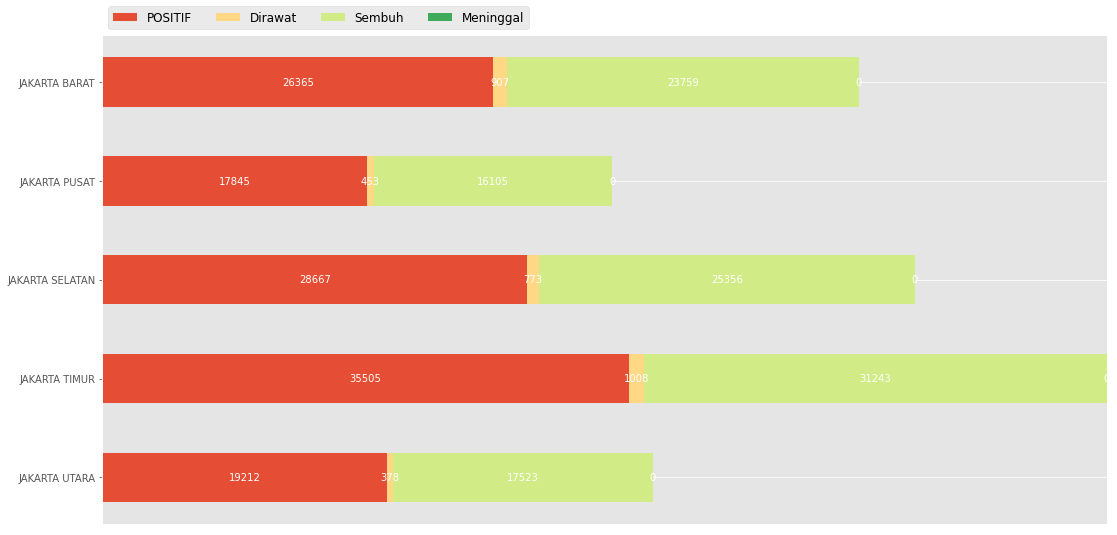

In [317]:
indikator = ['POSITIF','Dirawat','Sembuh','Meninggal']
provinsi = {
    'JAKARTA BARAT': barat,
    'JAKARTA PUSAT': pusat,
    'JAKARTA SELATAN': selatan,
    'JAKARTA TIMUR': timur,
    'JAKARTA UTARA': utara,
    
}


def survey(provinsi, indikator):
  
    labels = list(provinsi.keys())
    data = np.array(list(provinsi.values()))
    data_cum = data.cumsum(axis=1)
    indikator_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(18, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(indikator, indikator_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(indikator), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(provinsi, indikator)
plt.show()

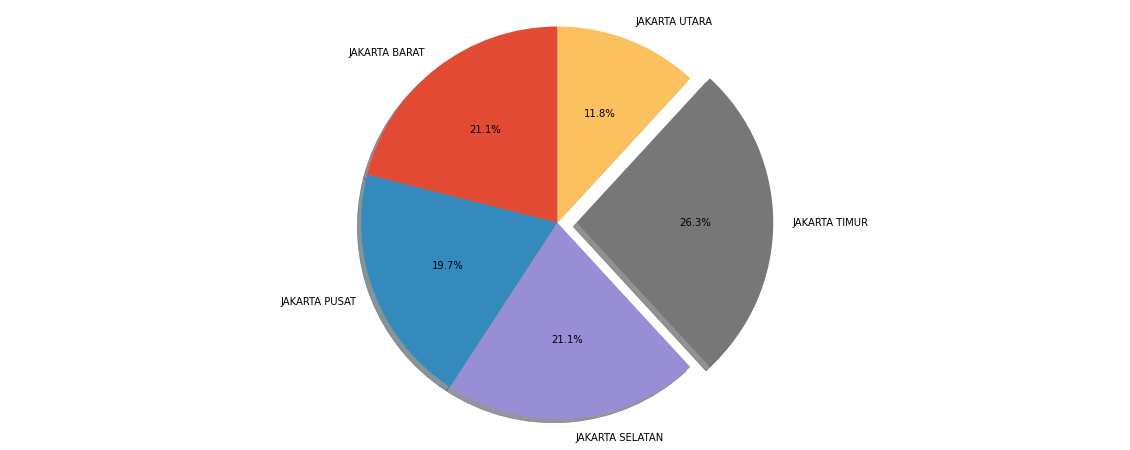

In [320]:
labels = 'JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR','JAKARTA UTARA'
sizes = [16, 15, 16, 20, 9]
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

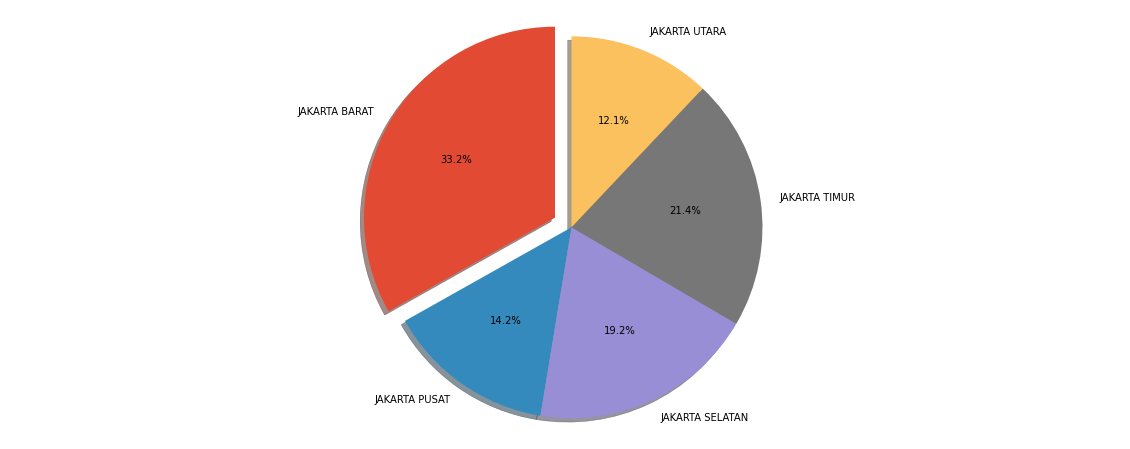

In [321]:
labels = 'JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR','JAKARTA UTARA'
sizes = [121, 52, 70, 78, 44]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

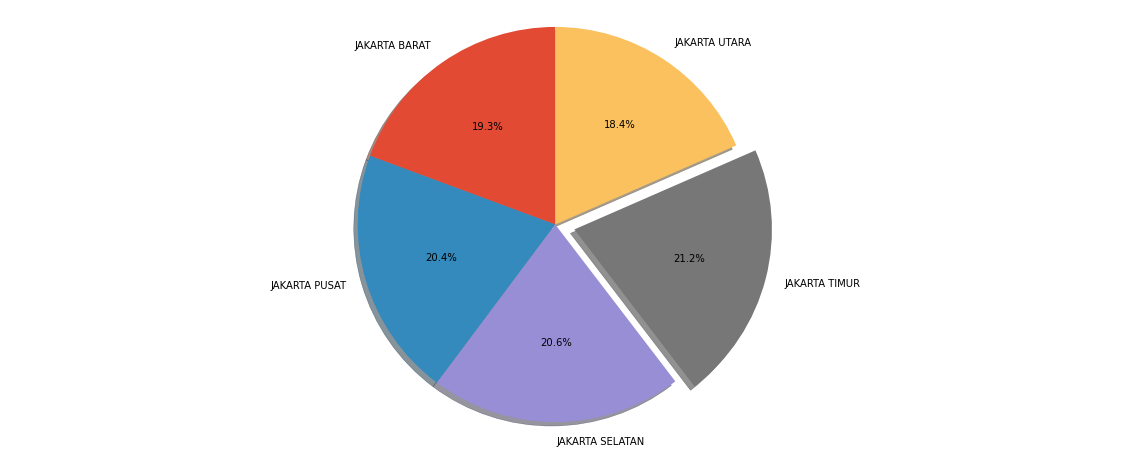

In [322]:
labels = 'JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR','JAKARTA UTARA'
sizes = [107, 113, 114, 117, 102]
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [323]:
df_total.head()

,nama_kota,POSITIF,id,SUSPEK,Suspek Meninggal,PROBABLE,Probable Meninggal,DISCARDED,Self Isolation,Dirawat,Sembuh,Meninggal
0,JAKARTA BARAT,26365,ID3174,47540,163,86,3,1460,1139,907,23759,0
1,JAKARTA PUSAT,17845,ID3173,27017,81,110,1,1268,885,453,16105,0
2,JAKARTA SELATAN,28667,ID3171,54834,104,157,3,1322,2031,773,25356,0
3,JAKARTA TIMUR,35505,ID3172,58384,110,175,5,2569,2600,1008,31243,0
4,JAKARTA UTARA,19212,ID3175,37404,57,72,0,3274,945,378,17523,0
